In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
import json
import pickle
import gzip
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
electronics_meta = pd.read_csv("/content/drive/MyDrive/BE_proj/Data/meta_elec.csv")

In [ ]:
electronics_meta.head()

,Unnamed: 0,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[['Electronics', 'Computers & Accessories', 'C...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[['Electronics', 'Computers & Accessories', 'C...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[['Electronics', 'Computers & Accessories', 'P...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[['Electronics', 'Accessories & Supplies', 'Au...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[['Electronics', 'GPS & Navigation', 'Vehicle ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [ ]:
a = electronics_meta.loc[electronics_meta['asin'] == "0972683275"]
b = 1
if (a.empty):
  print(a)
else:
  print(a)  



    Unnamed: 0  ...      brand
38          38  ...  VideoSecu

[1 rows x 10 columns]


In [ ]:
# ind = df[df['asin']==query].index.values

In [ ]:
# electronics_meta.to_csv("meta_elec.csv")

In [ ]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
    # if( i >= 900000):
    #   break
  return pd.DataFrame.from_dict(df, orient='index')

df_elec_review_og = getDF('/content/drive/My Drive/BE_proj/Data/reviews_Electronics_5.json.gz')

In [ ]:
df_elec_review_og.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [ ]:
df_elec_review_og.shape


(1689188, 9)

In [ ]:
# Creating a copy of the dataframe
df_elec_review = df_elec_review_og.copy()

In [ ]:
# Dropping columns which are not useful anymore
unnecessary_columns = ['reviewTime','unixReviewTime','helpful','reviewText']
df_elec_review_og.drop(columns=unnecessary_columns, inplace=True)

In [ ]:
df_elec_review.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"


In [ ]:
# Dimension of the new data frame
df_elec_review.shape

(1689188, 9)

In [ ]:
# frames = [df1, df2, df3, df4]
# df = pd.concat(frames)
df = df_elec_review.copy()
df.shape

(1689188, 9)

In [ ]:
# df.to_csv('all.csv')

### Product based CF

In [ ]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged.head()

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",5,5,5,5,5,5,5,5
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",5,5,5,5,5,5,5,5
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",5,5,5,5,5,5,5,5
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",5,5,5,5,5,5,5,5
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",5,5,5,5,5,5,5,5


In [ ]:
df.shape

(1689188, 9)

In [ ]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

Selecting products which have more than 20 reviews








In [ ]:
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 20]
dfCount=dfCount.reset_index()
dfCount.drop('index',axis=1,inplace=True)
dfCount

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,totalReviewers,overallScore,summaryReview
0,A3U4AFML9SZPWK,B007WTAJTO,"Leith Tussing ""I like tacos.""","[0, 0]",I bought these for my ELPH 520 more for speed ...,5.0,Super fast memory card,1371945600,"06 23, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,Super fast memory card
1,A2DIQTZPF26T1L,B007WTAJTO,M. Nichols,"[1, 1]",the card arrived promptly in good condition. i...,5.0,"great price, good value",1364169600,"03 25, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,"great price, good value"
2,A21MMTDAFAUPQT,B007WTAJTO,mollie,"[0, 0]",well what can you say for the card it has plen...,5.0,room to record,1358208000,"01 15, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,room to record
3,AM1T7QCP4B8EW,B007WTAJTO,mojo,"[0, 0]",Phone's internal memory was nearly always full...,5.0,Gave my internal memory on my Samsung Galaxy S...,1394409600,"03 10, 2014",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,Gave my internal memory on my Samsung Galaxy S...
4,A3T6Z4XWXWGEEN,B007WTAJTO,Mohnish,"[0, 0]","Excellent product, comes with an full size SD ...",5.0,10MBps writes + 32MBps reads - Fabulous!,1369008000,"05 20, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,10MBps writes + 32MBps reads - Fabulous!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277943,A2R0H6EC9DF8DA,B0088RJ9HM,parabasz,"[0, 0]","Can't even tell that it's on, except that ther...",5.0,Very good product,1384560000,"11 16, 2013",20,20,20,20,20,20,20,20,20,5.0,Very good product
1277944,A23JEB4NAIIH2P,B00017LUOC,Koi Garden Guy,"[1, 1]",I am standardizing to the 77mm filter size and...,5.0,Great thin NIKON CPL,1254700800,"10 5, 2009",20,20,20,20,20,20,20,20,20,5.0,Great thin NIKON CPL
1277945,A2PDKIH1XJ2BQ2,B004UTR4HO,Dan Sangiorgio,"[1, 1]",Purchased this for my new canon t3i and didn't...,5.0,Great grip for Canon T3i,1343952000,"08 3, 2012",20,20,20,20,20,20,20,20,20,5.0,Great grip for Canon T3i
1277946,A3F2H2F60QCK7N,B004UTR4HO,CrossbladeX,"[0, 0]",I have been using this to shoot videos on my D...,5.0,Best for its price.,1363737600,"03 20, 2013",20,20,20,20,20,20,20,20,20,5.0,Best for its price.


In [ ]:
dfCount=dfCount.groupby('asin').filter(lambda x: len(x) >= 50)
dfCount.reset_index(inplace=True)
dfCount.drop('index', axis=1, inplace=True)
dfCount

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,totalReviewers,overallScore,summaryReview
0,A3U4AFML9SZPWK,B007WTAJTO,"Leith Tussing ""I like tacos.""","[0, 0]",I bought these for my ELPH 520 more for speed ...,5.0,Super fast memory card,1371945600,"06 23, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,Super fast memory card
1,A2DIQTZPF26T1L,B007WTAJTO,M. Nichols,"[1, 1]",the card arrived promptly in good condition. i...,5.0,"great price, good value",1364169600,"03 25, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,"great price, good value"
2,A21MMTDAFAUPQT,B007WTAJTO,mollie,"[0, 0]",well what can you say for the card it has plen...,5.0,room to record,1358208000,"01 15, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,room to record
3,AM1T7QCP4B8EW,B007WTAJTO,mojo,"[0, 0]",Phone's internal memory was nearly always full...,5.0,Gave my internal memory on my Samsung Galaxy S...,1394409600,"03 10, 2014",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,Gave my internal memory on my Samsung Galaxy S...
4,A3T6Z4XWXWGEEN,B007WTAJTO,Mohnish,"[0, 0]","Excellent product, comes with an full size SD ...",5.0,10MBps writes + 32MBps reads - Fabulous!,1369008000,"05 20, 2013",4915,4914,4915,4915,4915,4915,4915,4915,4915,5.0,10MBps writes + 32MBps reads - Fabulous!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925688,A39I834U0PXWYO,B00375JBL4,Sthetford,"[0, 1]",Bought this thinking it would be a lot easier ...,3.0,Its alright,1335225600,"04 24, 2012",50,50,50,50,50,50,50,50,50,3.0,Its alright
925689,A28HVL8ZZJEH21,B00375JBL4,"KenP ""ken-p""","[3, 6]",I have come to the conclusion that there is no...,2.0,Better idea than implementation,1324598400,"12 23, 2011",50,50,50,50,50,50,50,50,50,2.0,Better idea than implementation
925690,A9BJ41Q8LG26V,B00375JBL4,Kenneth,"[0, 0]","I use this for my camera, phone and anything t...",4.0,It's good,1355443200,"12 14, 2012",50,50,50,50,50,50,50,50,50,4.0,It's good
925691,AZVCAU0336TWF,B002MFJXZY,familyman04,"[0, 0]",We have a cheetah shelving unit in the den wit...,4.0,Solid product,1398902400,"05 1, 2014",50,50,50,50,50,50,50,50,50,4.0,Solid product


In [ ]:
g = dfCount.groupby('asin', group_keys=False)
g = g.apply(lambda x: x.sample(50, replace = True).reset_index(drop=True))
dfCount=g.copy()
dfCount.reset_index(drop=True, inplace=True)

In [ ]:
dfCount

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,totalReviewers,overallScore,summaryReview
0,ALB2U20GGGJWU,0972683275,Tulsa Jim,"[0, 0]",This unit has worked perfectly in holding a 40...,5.0,Well Built,1397433600,"04 14, 2014",219,218,219,219,219,219,219,219,219,5.0,Well Built
1,A1BKKEWFMHS7XU,0972683275,R. Peck,"[0, 0]",Mounting the TV after mounting on wall can be ...,5.0,Good mount for medium size TV,1335744000,"04 30, 2012",219,218,219,219,219,219,219,219,219,5.0,Good mount for medium size TV
2,A12PFARGH9ELDI,0972683275,G. Kelly,"[0, 0]",For the price.....can't be beat. I have two T...,5.0,"For the price, can't be beat.",1377734400,"08 29, 2013",219,218,219,219,219,219,219,219,219,5.0,"For the price, can't be beat."
3,A1980MGZXSGJP,0972683275,"Captain ""Captain America""","[0, 0]",Works like a charm! Lies flat on the wall when...,5.0,Great product for a great price!,1361059200,"02 17, 2013",219,218,219,219,219,219,219,219,219,5.0,Great product for a great price!
4,AP7LSRPXT3ZL8,0972683275,Kyle,"[0, 0]",Exactly as described.Very heavy duty.Lots of p...,5.0,Excellent!,1357171200,"01 3, 2013",219,218,219,219,219,219,219,219,219,5.0,Excellent!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326195,A1501C38OCSEMA,B00K91DB7Y,"Literary Wonders! ""Literary Wonders!""","[0, 9]",I'm having a real problem with this modem. I a...,3.0,Leaving me frustrated,1405382400,"07 15, 2014",79,79,79,79,79,79,79,79,79,3.0,Leaving me frustrated
326196,A81XIM8XFKWX5,B00K91DB7Y,Vicki Bohn,"[2, 4]",This router was easy to set up right out of th...,5.0,Easy Set Up and Works Well,1404086400,"06 30, 2014",79,79,79,79,79,79,79,79,79,5.0,Easy Set Up and Works Well
326197,A1T2ZO4ARVSUGE,B00K91DB7Y,"D. Greenbaum ""DoctorDave""","[4, 4]",Our family has very high demands for a wireles...,3.0,Great hardware and terrible software,1404691200,"07 7, 2014",79,79,79,79,79,79,79,79,79,3.0,Great hardware and terrible software
326198,A1RQZMJMPMQTZA,B00K91DB7Y,"J. Bellizzi Jr. ""Gonzo""","[15, 18]",Ive had the Linksys e3000 for the past 4 years...,5.0,Big leap over the Linksys E3000,1403395200,"06 22, 2014",79,79,79,79,79,79,79,79,79,5.0,Big leap over the Linksys E3000


In [ ]:
counts = dfCount['asin'].value_counts().to_dict()
print (counts)

{'B005I6EU48': 50, 'B000O8WE66': 50, 'B00428C1I0': 50, 'B004S4R5CK': 50, 'B0000CE1UO': 50, 'B0038W0K20': 50, 'B009YQ8BTI': 50, 'B0007U00X0': 50, 'B002CTV060': 50, 'B001963NZI': 50, 'B004YLCFCM': 50, 'B00007EDZG': 50, 'B001CN9K6E': 50, 'B004QGXWSQ': 50, 'B009S2CWX4': 50, 'B007KZQM9G': 50, 'B0054L8N7M': 50, 'B007T8S490': 50, 'B008I646WG': 50, 'B0002SQ0A4': 50, 'B00005T3H5': 50, 'B000SE6IV8': 50, 'B003F5NS9W': 50, 'B001418WF4': 50, 'B005EIGUD4': 50, 'B000089GN4': 50, 'B00ARB5FLQ': 50, 'B009NHAEXE': 50, 'B0052RM8T2': 50, 'B008CS9M9C': 50, 'B0001FTVE0': 50, 'B00028ONIA': 50, 'B00003CWDH': 50, 'B001SJVU24': 50, 'B000J4WPW8': 50, 'B0039BPG4M': 50, 'B004PEIG12': 50, 'B00008OE6I': 50, 'B005DIBFYE': 50, 'B004U78628': 50, 'B007ILFFS6': 50, 'B004JQQDZ2': 50, 'B002B4P788': 50, 'B0049MV5OK': 50, 'B000VWOKRG': 50, 'B0002FHENE': 50, 'B001L6LG5K': 50, 'B0006PUDQK': 50, 'B004SD26Z2': 50, 'B0001Y7UAI': 50, 'B0015AARJI': 50, 'B003A4H2LI': 50, 'B00BCGRYY6': 50, 'B002KEA8OM': 50, 'B005UNFRU0': 50, 'B003WOL4

### Sentiment Analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()
dfCount['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in dfCount['summaryReview']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
dfCount.head()

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,totalReviewers,overallScore,summaryReview,sentiment_score
0,ALB2U20GGGJWU,0972683275,Tulsa Jim,"[0, 0]",This unit has worked perfectly in holding a 40...,5.0,Well Built,1397433600,"04 14, 2014",219,218,219,219,219,219,219,219,219,5.0,Well Built,0.2732
1,A1BKKEWFMHS7XU,0972683275,R. Peck,"[0, 0]",Mounting the TV after mounting on wall can be ...,5.0,Good mount for medium size TV,1335744000,"04 30, 2012",219,218,219,219,219,219,219,219,219,5.0,Good mount for medium size TV,0.4404
2,A12PFARGH9ELDI,0972683275,G. Kelly,"[0, 0]",For the price.....can't be beat. I have two T...,5.0,"For the price, can't be beat.",1377734400,"08 29, 2013",219,218,219,219,219,219,219,219,219,5.0,"For the price, can't be beat.",0.0000
3,A1980MGZXSGJP,0972683275,"Captain ""Captain America""","[0, 0]",Works like a charm! Lies flat on the wall when...,5.0,Great product for a great price!,1361059200,"02 17, 2013",219,218,219,219,219,219,219,219,219,5.0,Great product for a great price!,0.8588
4,AP7LSRPXT3ZL8,0972683275,Kyle,"[0, 0]",Exactly as described.Very heavy duty.Lots of p...,5.0,Excellent!,1357171200,"01 3, 2013",219,218,219,219,219,219,219,219,219,5.0,Excellent!,0.6114


### Grouping all the summary Reviews by product ID

In [ ]:
dfProductReview = df.groupby("asin", as_index=False).mean()
dfSentimentScore = dfCount.groupby("asin", as_index=False)["sentiment_score"].mean()

ProductReviewSummary = dfCount.groupby("asin")["reviewText_x"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [ ]:
dfSentimentScore.head(2)

,asin,sentiment_score
0,0972683275,0.40482
1,1400532655,0.19169


In [ ]:
dfProductReview.head(2)

,asin,overall,unixReviewTime
0,0528881469,2.4,1.310515e+09
1,0594451647,4.2,1.396328e+09


In [ ]:
ProductReviewSummary.head(2)

,reviewText_x
asin,
0972683275,[This unit has worked perfectly in holding a 4...
1400532655,[I should preface this by saying I also own a ...


### create dataframe with certain columns

In [ ]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')
df3 = pd.merge(df3, dfSentimentScore, on="asin", how='inner')

In [ ]:
df3.rename(columns = {'reviewText_x':'summaryReview'}, inplace = True)

In [ ]:
df3.head()

,asin,summaryReview,overall,unixReviewTime,sentiment_score
0,0972683275,['This unit has worked perfectly in holding a ...,4.461187,1.354240e+09,0.404820
1,1400532655,"[""I should preface this by saying I also own a...",3.807339,1.323475e+09,0.191690
2,140053271X,"[""Barnes and Noble hit one out of the park wit...",3.830986,1.347307e+09,0.356008
3,9983891212,['...you can buy this 10foot cable for such a ...,4.702381,1.352670e+09,0.322744
4,B00000DM9W,"[""I looked at several brands of AM FM TV Weath...",4.607843,1.178615e+09,0.411256


In [ ]:
df3 = df3[['asin','summaryReview','overall', 'sentiment_score']]

In [ ]:
# df3 = dfCount[['asin','summaryReview','overallScore']]

In [ ]:
df3

,asin,summaryReview,overall,sentiment_score
0,0972683275,['This unit has worked perfectly in holding a ...,4.461187,0.404820
1,1400532655,"[""I should preface this by saying I also own a...",3.807339,0.191690
2,140053271X,"[""Barnes and Noble hit one out of the park wit...",3.830986,0.356008
3,9983891212,['...you can buy this 10foot cable for such a ...,4.702381,0.322744
4,B00000DM9W,"[""I looked at several brands of AM FM TV Weath...",4.607843,0.411256
...,...,...,...,...
6519,B00JC5Y6WM,"[""I've used WordPerfect Office for a few years...",4.583333,0.324518
6520,B00JC5Y6YA,['I am old enough to remember when Word Perfec...,4.281690,0.258360
6521,B00JDAIMQ2,['It arrived very quickly. It is very well mad...,4.616667,0.321328
6522,B00JP12170,"[""By far, the Pencil by Fifty Three is the bes...",4.000000,0.440058


### Text Cleaning - Summary column

In [ ]:
#function for tokenizing summary
from nltk.stem import PorterStemmer
st = PorterStemmer()

regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()

    # reviewText = (" ".join([st.stem(i) for i in reviewText.split()]))

    return reviewText

In [ ]:
#clean summary
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)

In [ ]:
# dfCount

In [ ]:
df4 = df3[['asin']]
df4

,asin
0,0972683275
1,1400532655
2,140053271X
3,9983891212
4,B00000DM9W
...,...
6519,B00JC5Y6WM
6520,B00JC5Y6YA
6521,B00JDAIMQ2
6522,B00JP12170


In [ ]:
df4.loc[0]

asin    0972683275
Name: 0, dtype: object

In [ ]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 8000, stop_words='english', ngram_range=(1,2)) 
transformedReviews = countVector.fit_transform(reviews) 


dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [ ]:
#save 
# dfReviews.to_csv("dfReviews.csv")

In [ ]:
dfReviews

,aa,aa batteries,aa battery,aaa,aaa batteries,aacute,abc,abilities,ability,ability use,able,able access,able charge,able connect,able hear,able make,able play,able set,able use,able watch,absolute,absolutely,absolutely love,abuse,ac,ac adapter,ac power,accept,acceptable,accepted,accepts,access,access internet,access point,accessed,accessible,accessing,accessories,accessory,accident,...,year ago,year half,year old,year use,year warranty,years,years ago,years come,years later,years old,years use,years ve,yellow,yes,yesterday,yn,yongnuo,young,youtube,youtube video,youtube videos,yr,yr old,yrs,zagg,zen,zero,zip,zipper,zippered,zippers,zone,zoom,zoom lens,zoom range,zoomed,zooming,zooms,zs,zune
0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,1,3,0,11,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,12,0,0,0,0,2,0,1,0,...,0,0,2,0,0,2,0,0,0,0,0,0,0,2,1,0,0,0,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,12,0,0,0,0,0,0,0,3,...,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,28,4,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,0,0,0,0,0,0,0,0,16,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,23,3,0,0,1,1,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6520,0,0,0,0,0,0,0,0,5,0,9,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,4,0,0,0,2,0,0,0,0,...,0,0,3,0,0,22,2,0,1,0,3,0,0,4,0,0,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6521,0,0,0,0,0,0,0,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6522,0,0,0,0,0,0,0,0,6,0,16,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,...,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0


In [ ]:
df3.head()

,asin,summaryReview,overall,sentiment_score,summaryClean
0,0972683275,['This unit has worked perfectly in holding a ...,4.461187,0.404820,this unit has worked perfectly in holding a tv...
1,1400532655,"[""I should preface this by saying I also own a...",3.807339,0.191690,i should preface this by saying i also own a n...
2,140053271X,"[""Barnes and Noble hit one out of the park wit...",3.830986,0.356008,barnes and noble hit one out of the park with ...
3,9983891212,['...you can buy this 10foot cable for such a ...,4.702381,0.322744,you can buy this foot cable for such a great p...
4,B00000DM9W,"[""I looked at several brands of AM FM TV Weath...",4.607843,0.411256,i looked at several brands of am fm tv weather...


### PCA

#### Standard scaler

In [ ]:
# Standardizing the features
x_scaled_review = StandardScaler().fit_transform(dfReviews)

In [ ]:
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(x_scaled_review)
principalDf = pd.DataFrame(data = principalComponents)

In [ ]:
principalDf.shape

(6524, 50)

In [ ]:
finalDf = pd.concat([df4, df3[["overall"]], df3[["sentiment_score"]], principalDf ], axis = 1)

In [ ]:
finalDf

,asin,overall,sentiment_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0972683275,4.461187,0.404820,-12.089760,0.595153,-1.270985,-0.379420,7.391825,-2.045754,-0.461789,4.809985,2.632734,5.764526,1.544950,0.251077,3.948071,1.981074,5.507611,5.665690,-3.236108,8.146986,-2.144183,-5.500029,-9.638974,13.307144,-0.269504,3.194284,-1.296484,1.207692,0.060542,-1.497980,1.791459,-3.516270,-6.045212,6.069751,0.407009,5.706458,4.890523,4.459561,-3.649446,-5.343654,1.382809,4.060138,-5.495427,-1.294286,-2.105152,-3.176296,2.958067,-3.384651,-5.208351,-1.776502,-1.392667,-1.800472
1,1400532655,3.807339,0.191690,25.843952,-9.916850,-1.291823,8.042505,1.677686,-1.468938,7.057282,-3.843840,-5.691184,-11.660643,-1.927533,5.668526,-15.202967,0.907759,2.846186,2.700522,-3.722038,0.154491,1.384795,-3.901658,0.296211,1.468014,-7.841650,-0.119447,5.194986,-1.272824,3.518838,-0.018923,-4.254969,-7.178923,6.367894,0.952020,-3.699868,1.219887,-3.322292,0.953290,-0.514223,-1.035143,-3.078529,3.042618,0.372064,1.509651,-3.316238,-0.575806,2.769834,0.070309,-1.644457,-1.110117,1.371806,-4.702299
2,140053271X,3.830986,0.356008,13.861319,-6.192579,-1.313267,10.119891,0.602570,1.338354,7.030812,-6.070646,-4.205501,-9.486008,-0.147586,3.371225,-5.776090,3.586399,1.951654,1.562387,-0.526238,0.702418,1.745641,-4.521329,1.309531,1.674511,-2.809272,0.061330,7.773834,-0.889159,0.748683,1.880693,-1.235258,-6.615098,1.693449,-1.453453,-3.774996,1.007743,-4.121430,1.051383,-2.751207,-2.265141,-0.603395,2.030238,-1.179342,-0.391362,-5.196479,-1.768835,2.077840,3.170453,2.258184,-2.765751,-0.618108,-3.445273
3,9983891212,4.702381,0.322744,-15.066279,1.926970,-4.227593,-7.214230,4.446432,-2.060754,3.508359,-3.332011,-0.278867,0.159117,-0.948530,-1.298878,-1.470416,-2.001334,-0.769721,2.177155,1.305641,7.768119,1.082158,-0.318550,3.753930,-1.789923,-1.877515,-2.232858,-1.475397,3.073986,4.120993,-1.287672,-2.956705,4.698985,-0.601967,-1.803014,-1.283295,-5.426682,1.219046,2.944952,-2.847144,-2.189409,-0.479907,-5.392195,3.631596,-1.374088,-4.240991,-0.093894,-2.153206,-1.349308,-0.991904,-0.803461,0.060034,-0.963755
4,B00000DM9W,4.607843,0.411256,-2.854284,1.122247,3.423327,-1.715535,2.349848,4.959942,1.195082,-3.469510,-0.466409,3.742583,0.105249,3.089442,-0.164063,3.700624,1.183364,-0.359102,-9.415139,-10.112303,-1.714348,1.124460,0.368503,-0.080323,3.646602,2.853815,2.846893,1.237334,-2.574008,-0.451665,4.573552,1.246769,4.366495,-0.472211,-2.892555,-4.703746,1.966841,-2.295083,4.112657,1.586441,-6.333014,-0.596129,-1.281278,10.060195,-2.360150,0.387591,2.462224,-2.641141,-0.167788,-4.937349,-0.022287,4.291230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,B00JC5Y6WM,4.583333,0.324518,32.566181,-14.394645,-7.559424,14.010774,-12.254924,-6.675245,13.688770,-4.467621,0.251038,-13.266940,5.850882,-3.699379,-5.049239,25.909030,-3.823921,18.214060,-3.721508,22.485287,22.876126,14.172723,-9.850197,-5.054197,27.250561,0.692126,4.616647,2.009017,-21.423708,-3.948251,-9.361580,-6.018394,1.240733,11.080274,-5.172211,-4.336331,-7.534443,2.456400,-3.369884,0.133327,-3.910454,7.401804,8.957355,-3.537845,-6.081685,1.790614,9.939377,-7.050522,-0.979033,-4.605264,-10.621824,4.454949
6520,B00JC5Y6YA,4.281690,0.258360,28.459527,-11.377201,-5.910663,12.029058,-8.615213,-5.456644,11.396686,-2.884752,2.668535,-11.508326,5.658232,-2.357338,-3.415117,20.055440,-2.673569,16.717834,-2.413744,17.888914,17.573470,10.612654,-7.529603,-4.539646,22.704718,-3.361574,5.172723,1.350262,-13.803475,-3.395068,-7.216269,-6.624060,2.636556,7.959152,-5.050718,-2.653690,-5.461223,1.879296,-2.268048,0.711965,-3.623343,6.757748,6.926600,-4.110019,-4.837627,2.473988,8.294698,-2.945733,-0.102336,-3.127133,-12.767783,3.282940
6521,B00JDAIM

In [ ]:
finalDf = finalDf.sample(frac=1).reset_index(drop=True)

In [ ]:
finalDf.head()

,asin,overall,sentiment_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,B003FVI2KQ,4.881356,0.292842,12.715585,-5.971332,-2.788143,-0.351298,-17.505228,-16.647166,13.937056,28.296632,11.196263,15.650314,12.136737,12.432769,-26.868850,3.942928,-6.216424,-9.847795,1.209339,2.630832,-0.498302,8.483207,5.290837,0.215880,-4.689640,17.289000,-6.473644,-0.067705,-17.895036,12.511697,13.898731,14.483983,3.856846,-31.337800,-1.066004,-1.147639,9.232583,-2.587897,4.392520,-14.858555,3.984542,0.527292,16.776520,-9.511827,0.654191,-9.071696,10.175788,-8.440686,-9.360029,-2.510914,0.306876,3.090929
1,B000HAR8UI,4.493671,0.406020,5.557907,0.982196,0.564859,-4.519306,7.741003,-8.333265,7.760204,2.486901,3.897257,0.659435,2.108911,1.004001,-1.734605,-9.437494,3.642859,8.076022,1.455832,-0.573837,2.062685,-2.933696,-1.021267,-1.109157,8.593875,-1.540662,0.878892,2.643003,4.940310,4.026372,1.985512,-3.490188,1.916728,-1.915653,-2.344269,-3.339795,0.021438,-5.394393,4.253059,-0.177202,2.333636,-6.901089,-5.257776,-0.886313,-10.145408,5.030676,-0.164365,9.259214,-3.201224,0.739869,-7.096430,-1.724683
2,B000OTF6G0,4.160920,0.312730,-3.930363,-1.843120,3.942536,-4.939072,1.664279,7.009325,-0.165142,-2.747619,-0.168001,4.005791,-2.657054,5.141010,0.592821,2.748826,-2.144119,-2.018895,-7.292704,-4.302630,-0.829313,-2.033639,2.978113,-0.331917,1.171809,-2.373972,0.207188,5.165424,0.621571,1.302925,5.888873,-1.225107,6.183042,0.978135,-1.784486,-4.702210,4.101267,-2.084226,-2.109898,0.012103,-6.617543,1.958484,1.744249,3.483244,2.589312,0.729604,2.850903,-0.032105,3.466696,-0.768028,0.215522,1.060061
3,B001VEIYAC,3.593750,0.158600,52.683990,-18.591888,-3.476612,16.828643,16.490283,66.570011,24.896330,25.297641,5.129883,0.209143,-4.781541,-7.176472,-0.923774,-7.379388,-6.744358,5.707719,9.459959,-0.216582,-3.125054,-1.197684,2.623982,-0.061299,0.933714,-10.586335,4.317782,3.667160,-5.006550,-8.349166,1.378791,-2.170511,-6.959022,-0.778479,-1.393118,-0.232064,-0.410900,-1.897310,-2.944032,-3.879011,1.989577,-7.517531,2.991067,0.327469,-4.724509,-0.435839,-1.757111,1.716503,-2.583539,-2.027207,-1.212867,-3.557808
4,B0027P9C9G,4.637363,0.341328,-10.594321,-2.535980,-4.503598,-2.257756,-5.500527,-4.405606,6.524057,4.618795,2.433362,-0.622753,3.952050,1.366112,-7.943460,-0.379115,-2.239082,1.848788,0.059026,-0.728077,-1.890009,2.372844,0.110791,-1.993849,-0.069332,2.977896,-2.533097,-0.751926,-2.150054,3.810554,2.645130,1.710194,-2.433281,-0.626518,1.579471,1.715461,3.625634,-1.297323,-0.753444,-0.757111,-0.080521,0.081266,-0.466262,0.558016,-0.471484,-2.228564,0.434890,-1.912773,-2.262424,-2.119923,2.086630,1.071326


In [ ]:
finalDf['asin'] = finalDf['asin'].astype(str)

In [ ]:
# saving the processed data
finalDf.to_csv("Processed_data.csv")

No handles with labels found to put in legend.


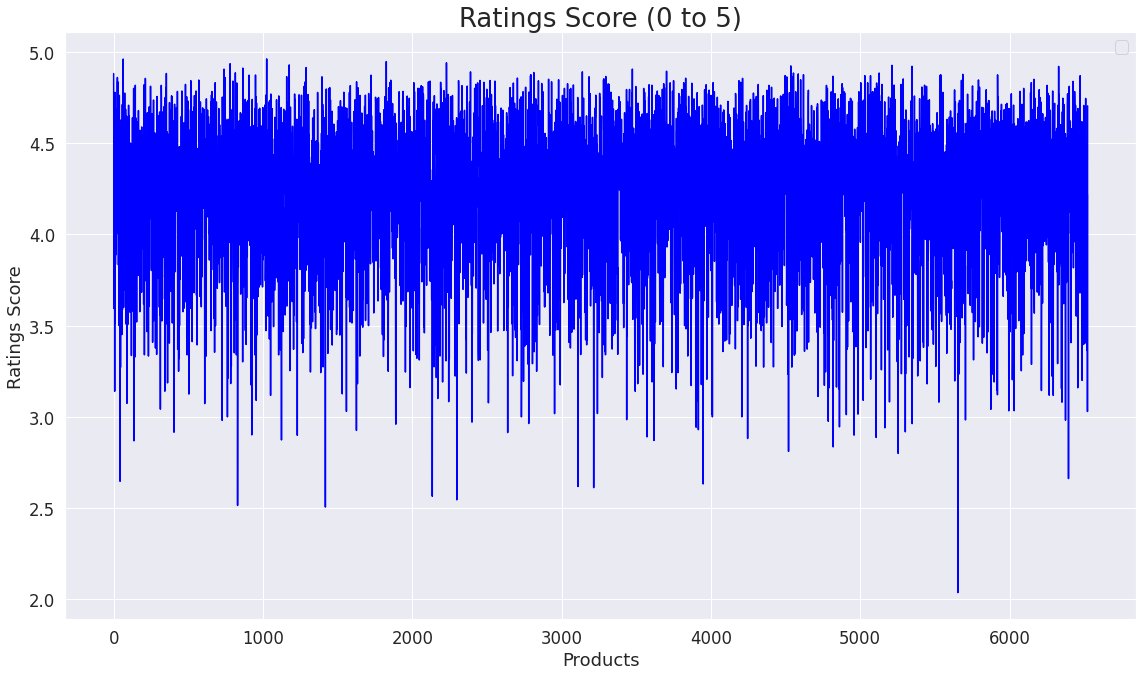

In [ ]:
# Ratings line graph

sb.set(font_scale=1.5)
plt.plot(finalDf.index, finalDf.overall, color = 'blue')
plt.legend()
plt.title('Ratings Score (0 to 5)', fontsize=26)
plt.xlabel('Products')
plt.ylabel('Ratings Score')
# setting figure resolution as 1920x1080
figure = plt.gcf()  # get current figure
figure.set_size_inches(19.2, 10.8)

plt.show()

No handles with labels found to put in legend.


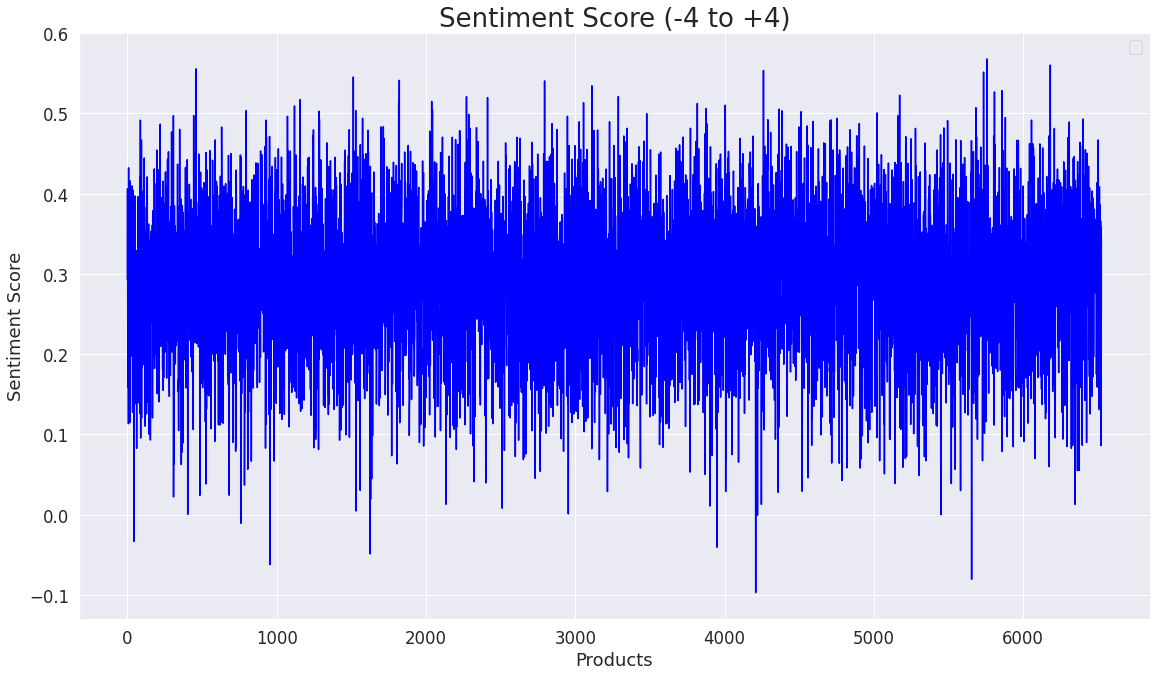

In [ ]:
# Sentiment score line graph

sb.set(font_scale=1.5)
plt.plot(finalDf.index, finalDf.sentiment_score, color = 'blue')
plt.legend()
plt.title('Sentiment Score (-4 to +4)', fontsize=26)
plt.xlabel('Products')
plt.ylabel('Sentiment Score')
# setting figure resolution as 1920x1080
figure = plt.gcf()  # get current figure
figure.set_size_inches(19.2, 10.8)

plt.show()

In [ ]:
# Pearson Correlation between water overall ratings and sentiment score

df_corr = finalDf[['overall', 'sentiment_score']]

pearsoncorr = df_corr.corr(method='pearson')
print(pearsoncorr)

                  overall  sentiment_score
overall          1.000000         0.520231
sentiment_score  0.520231         1.000000


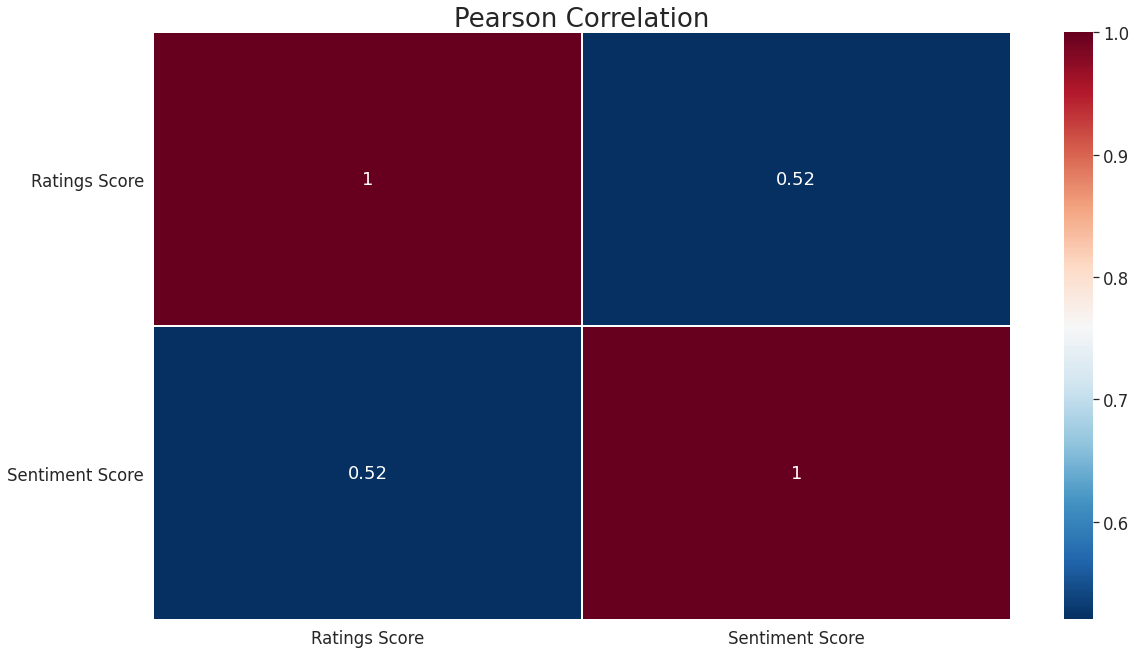

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=['Ratings Score', 'Sentiment Score'],
            yticklabels=['Ratings Score', 'Sentiment Score'],
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Pearson Correlation', fontsize=26)
# setting figure resolution as 1920x1080
figure = plt.gcf()  # get current figure
figure.set_size_inches(19.2, 10.8)

### Label encoding the target column

In [ ]:
# read the processed csv file
# finalDf = pd.read_csv("/content/drive/MyDrive/BE_proj/Model/Processed_data.csv")
finalDf = pd.read_csv("Processed_data.csv")

finalDf.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
finalDf['asin'] = le.fit_transform(finalDf['asin'])

In [ ]:
# le.classes_

In [ ]:
finalDf.head(4)

,asin,overall,sentiment_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2943,4.062500,0.082780,15.956699,-10.325100,-4.863484,-4.878382,8.720848,-0.643119,-6.530713,-2.244555,-3.047301,-3.630653,-1.365660,-7.416186,-1.906217,6.366599,3.373774,5.277200,-10.617259,7.704383,7.661655,-5.005905,1.777651,-4.186171,6.135024,-3.236622,7.821787,-2.537221,6.489640,-6.597885,-5.610289,-0.366832,3.236885,-13.018898,-4.058070,-2.573319,-0.632712,2.113809,-6.948362,-3.538757,2.065856,5.379973,-7.826581,1.619232,-1.404459,-14.044263,1.502247,-0.099039,-5.211470,2.884586,6.868604,5.948299
1,3777,3.669725,0.223848,-4.970375,-10.984325,-6.586909,-3.808650,-4.815925,-1.496386,7.648182,2.640861,1.823077,-1.046099,-2.897978,2.761833,-0.627537,-2.686415,-1.900037,-3.146888,0.546470,-0.334366,-2.020451,1.489618,2.896979,-1.867857,0.921195,-2.614991,-1.982195,1.354140,2.781642,2.290576,2.292965,0.046138,-5.354390,0.612195,2.731085,-2.157260,1.163712,-1.698274,2.369514,-0.352759,-1.436925,0.824660,3.800906,4.766463,-0.776942,-0.458400,0.922784,0.274204,0.803550,1.104909,-1.470645,1.395256
2,5594,4.280488,0.303618,-9.395910,-0.317223,0.171968,5.769859,0.750498,1.614416,-3.007418,8.132054,1.905523,-1.745559,2.067339,0.994822,-0.212050,-4.067891,-6.123807,0.365815,-3.741660,-2.896311,-4.309106,-6.611558,-1.784555,-1.217194,0.338605,1.877000,2.368322,0.608157,-1.117630,1.765888,-0.752279,2.290438,-0.414693,1.379978,1.113939,-0.664876,-1.829270,1.576409,-1.119514,1.603995,0.221058,-0.720009,0.022444,1.365026,0.475264,0.492978,1.333802,-0.178608,-0.613610,0.079880,0.144567,-1.941472
3,4849,3.926471,0.198732,-12.885739,4.061569,-5.428063,-4.264943,-2.011482,4.953827,-3.481105,3.227826,-1.812603,-1.141870,1.270606,3.725559,3.236944,-4.381900,2.448215,5.377349,1.640336,2.905451,5.490927,-4.946548,-2.992796,4.978073,0.747971,-1.085143,2.296949,0.125937,0.016246,-0.301736,-3.616283,-0.200111,-6.272147,3.653004,-1.342374,-2.513940,-3.043949,-6.633563,-2.759827,1.115587,-5.722135,-1.543173,1.879681,-0.360012,1.992402,-0.842143,-4.268267,3.277227,1.465951,3.660912,-0.359148,-3.706016


In [ ]:
le.inverse_transform(finalDf['asin'])

array(['B003DPKOKK', 'B004LPY204', 'B0095R71FG', ..., 'B0013FLTNS',
       'B002TLTIS8', 'B000Q30420'], dtype=object)

In [ ]:
df3.head()

,asin,summaryReview,overall,sentiment_score,summaryClean
0,0972683275,"[""The TV is still hanging from the wall so tha...",4.461187,0.243526,the tv is still hanging from the wall so that ...
1,1400532655,"[""Bought this for my wife to replace her aging...",3.807339,0.330338,bought this for my wife to replace her aging s...
2,140053271X,"[""Great product, easy to use and set up--after...",3.830986,0.259418,great product easy to use and set up after com...
3,9983891212,['What can I say - it works at a fraction of t...,4.702381,0.320388,what can i say it works at a fraction of the p...
4,B00000DM9W,"[""Sony does it again. They have put together ...",4.607843,0.506114,sony does it again they have put together a gr...


### KNN

In [ ]:
# Create feature and target arrays 
X = finalDf.drop('asin',axis=1)
y = finalDf.asin
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=5) 
  
knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(X, y) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
distances, indices = knn.kneighbors(X.iloc[[0]],  n_neighbors=10)
print(distances, indices)
og=y.iloc[0]
# print(og)
print("og:",le.inverse_transform([og]))

for i in range(6):
  if(i==0):
    continue
  a = y.iloc[indices[0][i]]
  print(le.inverse_transform([a]))

[[ 0.         13.82862088 14.85819599 16.45193179 19.56124027 20.97986687
  22.47602393 24.35500451 24.44963683 24.90762455]] [[   0 1996  915 4882 3673 5363  828 2780 4230 4687]]
og: ['B003DPKOKK']
['B009WROL6G']
['B009L04DCQ']
['B001TOD3KK']
['B001T6K7G6']
['B0014F9U6U']


### Exporting the model pkl file

In [ ]:
# Save model
with open('finalizedmode.sav', 'wb') as f:
    pickle.dump(knn, f)
# Reload from file
with open('finalizedmode.sav', 'rb') as f:
    loaded_model = pickle.load(f)

### Exporting the sentiment analysis meta data


In [ ]:
df_sent = dfCount[['asin','reviewerName_x', 'reviewTime_x','reviewText_x','overall_x', 'summary_x','sentiment_score']]

In [ ]:
df_sent.to_csv('meta_reviews_sentiment.csv')

### Meta data processing

In [ ]:
finalDf = pd.read_csv("Processed_data.csv")

df_meta_new = pd.DataFrame(columns = ['asin', 'imUrl', 'description', 'categories', 'title', 'price', 'salesRank', 'related', 'brand' ]) 

for i in range(len(finalDf)):
  temp = finalDf['asin'].iloc[i]
  a = electronics_meta.loc[electronics_meta['asin'] == temp]
  if (a.empty):
    continue
  else:
    df_meta_new = df_meta_new.append({'asin' : a['asin'].iloc[0], 'imUrl' : a['imUrl'].iloc[0], 'description' : a['description'].iloc[0], 'categories' : a['categories'].iloc[0], 'title' : a['title'].iloc[0], 'price' : a['price'].iloc[0], 'salesRank' : a['salesRank'].iloc[0] , 'related' : a['related'].iloc[0], 'brand' : a['brand'].iloc[0]}, ignore_index = True)


In [ ]:
df_meta_new.to_csv("elec_meta_new.csv")

In [ ]:
df_meta_new.shape

(6524, 9)

### Creating BOW

In [ ]:
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = re.sub('\[', "", reviewText)
    reviewText = re.sub('\]', "", reviewText)
    reviewText = re.sub("\'", "", reviewText)

    return reviewText

In [ ]:
df_meta_new["categories"] = df_meta_new["categories"].apply(cleanReviews)

In [ ]:
cat=[]
for i in range(len(df_meta_new)):
  word = df_meta_new['categories'].iloc[i].split(', ')
  for w in (word):
    if (w not in cat):
      cat.append(w)
  # break

print(cat)
  

['electronics', 'television & video', 'dvd players & recorders', 'dvd recorders', 'computers & accessories', 'networking products', 'network adapters', 'usb network adapters', 'cables & accessories', 'keyboard & mouse combos', 'camera & photo', 'accessories', 'batteries & chargers', 'batteries', 'camera batteries', 'battery chargers', 'camera', 'touch screen tablet accessories', 'cases & sleeves', 'cases', 'sleeves', 'accessories & supplies', 'audio & video accessories', 'headphone accessories', 'surge protectors', 'portable audio & video', 'radios', 'weather radios', 'data storage', 'external hard drives', 'floppy & tape drives', 'antennas', 'tv antennas', 'video', 'camcorders', 'cell phones & accessories', 'stylus pens', 'input devices', 'digital pens', 'screen protectors', 'computer components', 'fans & cooling', 'case fans', 'memory cards', 'sd & sdhc cards', 'digital cameras', 'digital slr cameras', 'basic cases', 'tablets', 'hubs', 'routers', 'webcams', 'mp3 players & accessories

In [ ]:
# update
cat_new=[]
for i in range(len(cat)):
  word_new = cat[i].split(' ')
  word_new = word_new[0]
  if (word_new not in cat_new):
    cat_new.append(word_new)

cat_new.sort()
print(cat_new)

['3d', 'ac', 'accessories', 'accessory', 'adapter', 'adapters', 'all-new', 'amplifier', 'amplifiers', 'amps', 'analog-to-digital', 'answering', 'antennas', 'antivirus', 'armbands', 'audio', 'automotive', 'auxiliary', 'av', 'aviation', 'background', 'backgrounds', 'backpacks', 'bag', 'bags', 'basic', 'batteries', 'battery', 'bd-r', 'binocular', 'binoculars', 'blank', 'blu-ray', 'bluetooth', 'boating', 'bookshelf', 'boomboxes', 'booms', 'briefcases', 'brushes', 'bullet', 'bundles', 'business', 'cable', 'cables', 'caller', 'camcorder', 'camcorders', 'camera', 'cameras', 'car', 'case', 'cases', 'cassette', 'cb', 'cd', 'cd-r', 'cell', 'center-channel', 'chamois', 'charger', 'chargers', 'cleaning', 'clock', 'clothing', 'cloths', 'coaxial', 'compact', 'compactflash', 'complete', 'component', 'composite', 'compressed', 'computer', 'computers', 'connectors', 'consoles', 'controllers', 'cooling', 'cord', 'corded-cordless', 'costumes', 'covers', 'cpu', 'darkroom', 'data', 'design', 'desk', 'deskt

In [ ]:
!pip install stemming

  Created wheel for stemming: filename=stemming-1.0.1-cp37-none-any.whl size=11139 sha256=796561a969de64d3f16e0b3cde929f5024c84694bd3500c56dda6669f688e065
  Stored in directory: /root/.cache/pip/wheels/e8/05/2e/2ddeb64d4464b854b48323f9676528c17560da7d153db7b0e2
Successfully built stemming


In [ ]:
from stemming.porter2 import stem

cat_new = [stem(word) for word in cat_new] 

In [ ]:
cat_new = list(set(cat_new))
cat_new.sort()
cat_new.insert(0,'asin')
print(cat_new)
print(len(cat_new))

['asin', '3d', 'ac', 'accessori', 'adapt', 'all-new', 'amp', 'amplifi', 'analog-to-digit', 'answer', 'antenna', 'antivirus', 'armband', 'audio', 'automot', 'auxiliari', 'av', 'aviat', 'background', 'backpack', 'bag', 'basic', 'batteri', 'bd-r', 'binocular', 'blank', 'blu-ray', 'bluetooth', 'boat', 'bookshelf', 'boom', 'boombox', 'briefcas', 'brush', 'bullet', 'bundl', 'busi', 'cabl', 'caller', 'camcord', 'camera', 'car', 'case', 'cassett', 'cb', 'cd', 'cd-r', 'cell', 'center-channel', 'chamoi', 'charger', 'clean', 'clock', 'cloth', 'coaxial', 'compact', 'compactflash', 'complet', 'compon', 'composit', 'compress', 'comput', 'connector', 'consol', 'control', 'cool', 'cord', 'corded-cordless', 'costum', 'cover', 'cpu', 'darkroom', 'data', 'design', 'desk', 'desktop', 'diffus', 'digit', 'digital-to-analog', 'diopter', 'disc', 'distribut', 'dock', 'document', 'dome', 'dvd', 'dvd+r', 'dvd+rw', 'dvd-r', 'dvd-ram', 'dvi', 'dvi-hdmi', 'earpad', 'ebook', 'educ', 'electron', 'ethernet', 'extend',

In [ ]:
df_cat = pd.DataFrame(np.zeros((6524, 317)))
df_cat.columns = cat_new
df_cat

,asin,3d,ac,accessori,adapt,all-new,amp,amplifi,analog-to-digit,answer,antenna,antivirus,armband,audio,automot,auxiliari,av,aviat,background,backpack,bag,basic,batteri,bd-r,binocular,blank,blu-ray,bluetooth,boat,bookshelf,boom,boombox,briefcas,brush,bullet,bundl,busi,cabl,caller,camcord,...,tablet,tabletop,telephon,telescop,televis,thunderbolt,tool,touch,trackbal,traffic,travel,tripod,truck,tuner,turntabl,tv,tv-dvd,two-way,umbrella,underwat,uninterrupt,usb,usb-to-usb,usb-to-vga,vehicl,vga,vhs-c,video,viewfind,voip,wall,wallet,warranti,water,weather,webcam,wii,wire,wireless,xbox
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(len(df_meta_new)):

  word = df_meta_new['categories'].iloc[i].split(', ')
  df_cat['asin'].iloc[i]=df_meta_new['asin'].iloc[i]
  word_new_lst=[]
  # print(word)
  # break
  for j in range(len(word)):
    word_new = word[j].split(' ')
    word_new = word_new[0]
    if (word_new not in word_new_lst):
      word_new_lst.append(word_new) 

  word_new_lst = [stem(w) for w in word_new_lst] 
  # print(word_new_lst)
  # break
  for w in (word_new_lst):
    df_cat[w].iloc[i] = 1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_cat

,asin,3d,ac,accessori,adapt,all-new,amp,amplifi,analog-to-digit,answer,antenna,antivirus,armband,audio,automot,auxiliari,av,aviat,background,backpack,bag,basic,batteri,bd-r,binocular,blank,blu-ray,bluetooth,boat,bookshelf,boom,boombox,briefcas,brush,bullet,bundl,busi,cabl,caller,camcord,...,tablet,tabletop,telephon,telescop,televis,thunderbolt,tool,touch,trackbal,traffic,travel,tripod,truck,tuner,turntabl,tv,tv-dvd,two-way,umbrella,underwat,uninterrupt,usb,usb-to-usb,usb-to-vga,vehicl,vga,vhs-c,video,viewfind,voip,wall,wallet,warranti,water,weather,webcam,wii,wire,wireless,xbox
0,B003DPKOKK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B004LPY204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B0095R71FG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B006ZC5PDE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B000LQMKDS,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,B002YETVVE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6520,B007YUISHQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6521,B0013FLTNS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6522,B002TLTIS8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Accuracy Calculation

In [ ]:
finalDf = finalDf.drop('Unnamed: 0',axis=1)
finalDf.head(1)

,asin,overall,sentiment_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,B003DPKOKK,4.0625,0.08278,15.956699,-10.3251,-4.863484,-4.878382,8.720848,-0.643119,-6.530713,-2.244555,-3.047301,-3.630653,-1.36566,-7.416186,-1.906217,6.366599,3.373774,5.2772,-10.617259,7.704383,7.661655,-5.005905,1.777651,-4.186171,6.135024,-3.236622,7.821787,-2.537221,6.48964,-6.597885,-5.610289,-0.366832,3.236885,-13.018898,-4.05807,-2.573319,-0.632712,2.113809,-6.948362,-3.538757,2.065856,5.379973,-7.826581,1.619232,-1.404459,-14.044263,1.502247,-0.099039,-5.21147,2.884586,6.868604,5.948299


In [ ]:
# Create feature and target arrays 
X = finalDf.drop('asin',axis=1)
y = finalDf.asin
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47) 
  
knn = KNeighborsClassifier(n_neighbors=1) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
y_pred = knn.predict(X_test)


In [ ]:
# converting y_test dataframe to list
y_test_list = y_test.tolist()
y_test_list[0]
# len(y_test_list)
len(y_test_list)

1305

In [ ]:
from numpy import dot
from numpy.linalg import norm

cos_sim=[]


for i in range(len(y_test_list)):
  tot = len(y_test_list)
  actual_asin = y_test_list[i]
  pred_asin = y_pred[i]

  actual = df_cat.loc[df_cat['asin'] == actual_asin]
  actual = actual.values.tolist()
  a = actual[0][1:]

  pred = df_cat.loc[df_cat['asin'] == pred_asin]
  pred = pred.values.tolist()
  b = pred[0][1:]

  cos = dot(a, b)/(norm(a)*norm(b))
  cos_sim.append(cos)

mean = sum(cos_sim) / len(cos_sim)
mean

0.8586303825535869

## Model performance in Precision

In [ ]:
# Create feature and target arrays 
X = finalDf.drop('asin',axis=1)
y = finalDf.asin
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=47) 
  
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=1) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
y_pred = knn.predict(X_test)

In [ ]:
# converting y_test dataframe to list
y_test_list = y_test.tolist()
y_test_list[0]
# len(y_test_list)
len(y_test_list)

653

In [ ]:
df_cat1 = df_cat
# df_cat1 = df_cat.loc[:, (df_cat==0).mean() < .996]

In [ ]:
from numpy import dot
from numpy.linalg import norm
from scipy import spatial, stats
import numpy as np


# cos_sim=[]

total = len(y_test_list)
p=0
r=0
for i in range(len(y_test_list)):
  tot = len(y_test_list)
  actual_asin = y_test_list[i]
  pred_asin = y_pred[i]

  actual = df_cat1.loc[df_cat1['asin'] == actual_asin]
  actual = actual.values.tolist()
  a = actual[0][1:]

  pred = df_cat1.loc[df_cat1['asin'] == pred_asin]
  pred = pred.values.tolist()
  b = pred[0][1:]

  cos = dot(a, b)/(norm(a)*norm(b))

  if (cos>0.6):
    p+=1


In [ ]:
precision = p/total * 100
precision

78.40735068912711